# Linear Regression model

## Reading data using Pandas
**Pandas** - Python library to explore, manipulate and analyze data.

In [1]:
import pandas as pd

In [4]:
#Read CSV from a url and save. Index_col will use the column for numbering.
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col = 0)
#Display first 5 rows.
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [5]:
data.tail()

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


Since the response variable (Sales) is continuous, this is a regression problem.

## Visualising data using SEABORN

**Seaborn** - Library for statistical data visualization build on top of matlab.

In [7]:
import seaborn as sb
%matplotlib inline

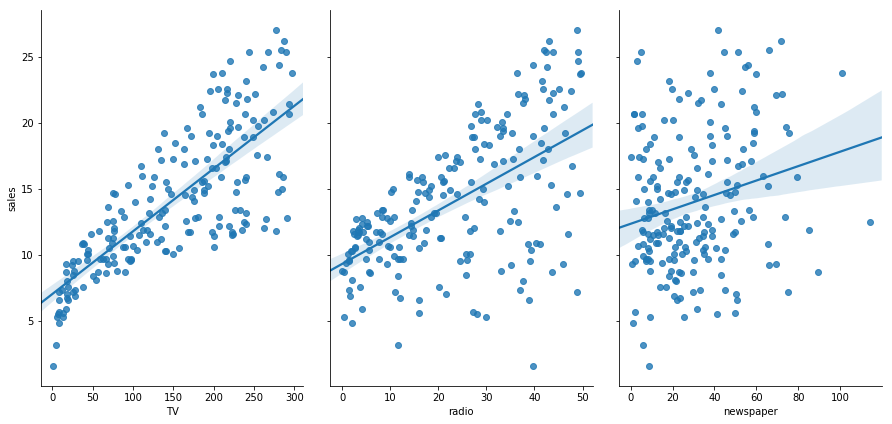

In [14]:
#Visualization between the features and response using scatterplots. 
sb.pairplot(data, x_vars = ['TV', 'radio', 'newspaper'], y_vars = 'sales', height = 6, aspect = 0.7, kind = 'reg')

### Linear Regression
**Pros** - Fast, no tuning required, highly interpretable, well-understood
**Cons** - Unlikely to produce  the best predictive accuracy. (Pre-assumes linear relationship between the features and response.)

#### Form of linear regression
$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ is the response
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (the first feature)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature)

In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

The $\beta$ values are called the model coefficients. These values are "learned" during the model fitting step using the "least squares" criterion. Then, the fitted model can be used to make predictions!

In [15]:
feature_columns = ['TV', 'radio', 'newspaper']
x = data[feature_columns]
x.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [16]:
y = data['sales']
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [18]:
#Split x and y into test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1)

In [20]:
# default split is 75% for training and 25% for testing
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


In [23]:
from sklearn.linear_model import LinearRegression
lrm = LinearRegression()
lrm.fit(x_train, y_train)
#Print intercept and feature coefficients
print(lrm.intercept_)
print(lrm.coef_)
#Pair the feature names with coeffs
list(zip(feature_columns, lrm.coef_))

2.8769666223179318
[0.04656457 0.17915812 0.00345046]


[('TV', 0.04656456787415028),
 ('radio', 0.17915812245088836),
 ('newspaper', 0.0034504647111804412)]

$$y = 2.88 + 0.0466 \times TV + 0.179 \times Radio + 0.00345 \times Newspaper$$
How do we interpret the TV coefficient (0.0466)?

- For a given amount of Radio and Newspaper ad spending, a "unit" increase in TV ad spending is associated with a 0.0466 "unit" increase in Sales.
- Or more clearly: For a given amount of Radio and Newspaper ad spending, an additional $1,000 spent on TV ads is associated with an increase in sales of 46.6 items.

Important notes:

- This is a statement of association, not causation.
- If an increase in TV ad spending was associated with a decrease in sales, $\beta_1$ would be negative.

In [24]:
y_pred = lrm.predict(x_test)

We need an evaluation metric in order to compare our predictions with the actual values!

### Model evaluation metrics for regression

Evaluation metrics for classification problems, such as accuracy, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continuous values.

Let's create some example numeric predictions, and calculate three common evaluation metrics for regression problems:

In [25]:
# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

In [27]:
# calculate MAE by hand
print((10 + 0 + 20 + 10)/4.)

# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0
10.0


**88Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [28]:
# calculate MSE by hand
print((10**2 + 0**2 + 20**2 + 10**2)/4.)

# calculate MSE using scikit-learn
print(metrics.mean_squared_error(true, pred))

150.0
150.0


**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [29]:
# calculate RMSE by hand
import numpy as np
print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4.))

# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.24744871391589
12.24744871391589


**Comparing these metrics:**

- MAE is the easiest to understand, because it's the average error.
- MSE is more popular than MAE, because MSE "punishes" larger errors.
- RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

### Computing the RMSE for our Sales predictions

In [30]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.4046514230328955


### Feature selection

Does Newspaper "belong" in our model? In other words, does it improve the quality of our predictions?

It only has a weak linear relationship with the response.

Let's remove it from the model and check the RMSE!

In [33]:
# create a Python list of feature names
feature_columns = ['TV', 'radio']

# use the list to select a subset of the original DataFrame
x = data[feature_columns]

# select a Series from the DataFrame
y = data.sales

# split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

# fit the model to the training data (learn the coefficients)
lrm.fit(x_train, y_train)

# make predictions on the testing set
y_pred = lrm.predict(x_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.3879034699382888


The RMSE **decreased** when we removed Newspaper from the model. (Error is something we want to minimize, so a **lower number for RMSE is better**.) Thus, it is unlikely that this feature is useful for predicting Sales, and should be removed from the model.